In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
import torchvision
import torchvision.transforms
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from torch.utils.data import DataLoader
from torchsummary import summary
from IPython.core.debugger import set_trace

from Tools import Trainer

## Loading datasets

In [2]:
from Tools.Dataloader import datasets_loader
train_loader, valid_loader, test_loader = datasets_loader()

## Hyper-parameters

In [3]:
hyperparams = {'num_epochs': 25,
               'lr0' :0.1, 
               'dropout':0.2,
               'save_checkpoint': False
                  }
cuda_available = torch.cuda.is_available()

## Creating the model

In [4]:
from Classifier.XavierCNN import XavierDropout

model = XavierDropout(hyperparams)

if cuda_available:
    model = model.cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=hyperparams['lr0'])
criterion = nn.CrossEntropyLoss()

In [5]:
summary(model, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 64, 64]             448
              ReLU-2           [-1, 16, 64, 64]               0
   GaussianDropout-3           [-1, 16, 64, 64]               0
            Conv2d-4           [-1, 32, 64, 64]           4,640
              ReLU-5           [-1, 32, 64, 64]               0
         MaxPool2d-6           [-1, 32, 32, 32]               0
   GaussianDropout-7           [-1, 32, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          18,496
              ReLU-9           [-1, 64, 32, 32]               0
  GaussianDropout-10           [-1, 64, 32, 32]               0
           Conv2d-11          [-1, 128, 32, 32]          73,856
             ReLU-12          [-1, 128, 32, 32]               0
  GaussianDropout-13          [-1, 128, 32, 32]               0
        MaxPool2d-14          [-1, 128,

## Training 

In [6]:
from Tools.Trainer import Trainer

trainer = Trainer(model, optimizer, criterion, train_loader, valid_loader, test_loader, hyperparams)
nll_train, nll_valid, acc_train, acc_valid =  trainer.train_model()
print('Done...')

------ Epoch # 1 ------
 Iteration 40: TRAIN 0.6925
 Iteration 80: TRAIN 0.6918
 Iteration 120: TRAIN 0.6874
------ Epoch # 2 ------
 Iteration 160: TRAIN 0.6869
 Iteration 200: TRAIN 0.6815
 [Loss] TRAIN 0.6749 / VALID 0.6789
 [ACC] TRAIN 0.5940 / VALID 0.5626
 Iteration 240: TRAIN 0.6721
 Iteration 280: TRAIN 0.6740
------ Epoch # 3 ------
 Iteration 320: TRAIN 0.6684
 Iteration 360: TRAIN 0.6617
 Iteration 400: TRAIN 0.6582
 [Loss] TRAIN 0.6389 / VALID 0.6432
 [ACC] TRAIN 0.6556 / VALID 0.6466
 Iteration 440: TRAIN 0.6460
------ Epoch # 4 ------
 Iteration 480: TRAIN 0.6494
 Iteration 520: TRAIN 0.6318
 Iteration 560: TRAIN 0.6208
------ Epoch # 5 ------
 Iteration 600: TRAIN 0.6109
 [Loss] TRAIN 0.5883 / VALID 0.5991
 [ACC] TRAIN 0.7006 / VALID 0.6897
 Iteration 640: TRAIN 0.6019
 Iteration 680: TRAIN 0.5954
 Iteration 720: TRAIN 0.5907
------ Epoch # 6 ------
 Iteration 760: TRAIN 0.5856
 Iteration 800: TRAIN 0.5723
 [Loss] TRAIN 0.5380 / VALID 0.5596
 [ACC] TRAIN 0.7299 / VALID 0

## Visualization

### accuracy and loss plots

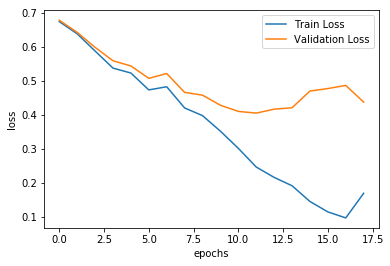

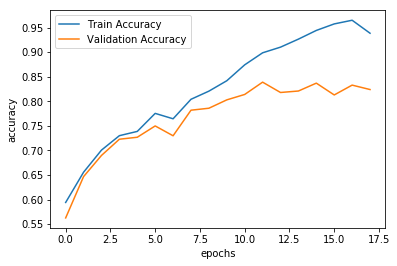

In [7]:
import Tools.Visualization as V
V.plots(nll_train, nll_valid, acc_train, acc_valid)

### Confusion Matrix

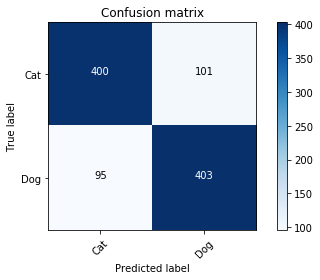

In [8]:
cnf_matrix = trainer.confusion_matrix()
V.plot_confusion_matrix(cnf_matrix)

## Generate Submission

In [9]:
import Tools.Trainer as T
results = T.predict_test_set(model, test_loader)
T.generate_submission(results)

Done...


## Saving the model

In [12]:
torch.save(model, "./Experiments/Xavier-Dropout-25-0.1-0.2")

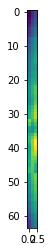

In [11]:
imgs, steering_angle = next(iter(test_loader))
im = imgs[0].numpy()[0]
plt.imshow(im)
# im2display = im.transpose((1,2,0))
# print(im2display.shape)
# plt.imshow(im2display, interpolation='nearest')
plt.show()